## Correlation Matrix
This notebook shows how to calculate a correlation matrix to explore if there are correlations any pair of columns in a datafram. The correlation coefficient can be Pearson's, Kendall's, or Spearmans.

In [1]:
# import some modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# read in some data
data = pd.read_csv('corr.csv')
print(data.shape)
data.head(6)

(30, 4)


,x1,x2,x3,x4
0,62,26,75,-25
1,84,36,52,-25
2,23,4,71,-30
3,17,9,98,-39
4,36,11,95,-43
5,44,19,96,-33


In [3]:
# you can find the correlation coefficients between columns on a data frame using the .corr method
data.corr(method='pearson')

,x1,x2,x3,x4
x1,1.000000,0.966402,-0.028893,0.091009
x2,0.966402,1.000000,0.033525,0.049976
x3,-0.028893,0.033525,1.000000,-0.960394
x4,0.091009,0.049976,-0.960394,1.000000


In [4]:
# alternatively, you can find the correlation coeff and the pvalue between individual columns using stats.pearsonr
stats.pearsonr(data.x1,data.x2)

(0.9664015321533101, 4.657914848204586e-18)

In [5]:
# let's define a function that returns two dataframes, one with correlation coefficients and the other with p-values
def calc_corr_matrix(data, dims):
    cmatrix = pd.DataFrame()
    pmatrix = pd.DataFrame()
    for row in dims:
        for col in dims:
            corrcoef ,pvalue = stats.pearsonr(data[row],data[col])
            cmatrix.loc[row,col] = corrcoef
            pmatrix.loc[row,col] = pvalue
    for each in dims:
        cmatrix.loc[each,each] = np.nan
        pmatrix.loc[each,each] = np.nan
    return cmatrix, pmatrix

In [6]:
# use the funtion
cmatrix, pmatrix = calc_corr_matrix(data,data.keys().values)

In [7]:
# look at results
cmatrix

,x1,x2,x3,x4
x1,NaN,0.966402,-0.028893,0.091009
x2,0.966402,NaN,0.033525,0.049976
x3,-0.028893,0.033525,NaN,-0.960394
x4,0.091009,0.049976,-0.960394,NaN


In [8]:
pmatrix

,x1,x2,x3,x4
x1,NaN,4.657915e-18,8.795352e-01,6.324436e-01
x2,4.657915e-18,NaN,8.603953e-01,7.931195e-01
x3,8.795352e-01,8.603953e-01,NaN,4.489767e-17
x4,6.324436e-01,7.931195e-01,4.489767e-17,NaN


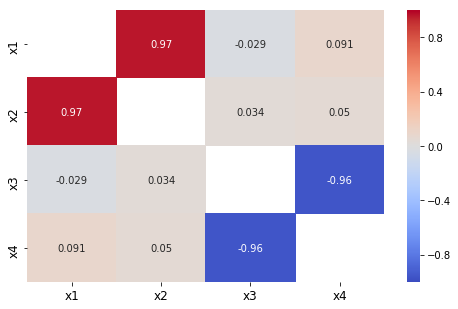

In [10]:
# plot a heatmap to show correlation coefficients
plt.figure(figsize=(8,5))
ax = sns.heatmap(cmatrix, center = 0, cmap='coolwarm', annot = True, vmin=-1, vmax=1)
ax.tick_params(axis='both', labelsize=12)
plt.show()